*Привет!*

*Меня зовут Фёдор, я буду проводить ревью твоего проекта.*

*Предлагаю общаться на «ты» :)*

*Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать отличным специалистом. Ниже ты найдешь мои комментарии, оформленные вот так: «Комментарий ревьюера:…»*

*Помни, что все мои комментарии являются рекомендациями, а не требованиями – только ты решаешь, как сделать этот проект лучше.*

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> </div>
    
Так выделены самые важные замечания. Их нужно обязательно отработать, перед тем как показывать работу другим специалистам по Data Science.
    

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚡:</b> </div>
    
Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше.
    
<div class="alert alert-success">
<b>Комментарий ревьюера ✅:</b> </div>
    
Так я выделяю правильные и верные действия, а так же все остальные комментарии.

In [13]:
import os
import numpy as np
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import ResNet50
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [2]:
# Путь к каталогу с изображениями обложек музыкальных альбомов
directory = "data"

# Загрузка изображений и извлечение признаков с помощью ResNet50
def extract_features(directory):
    model = ResNet50(weights='imagenet', include_top=False)
    features = []
    labels = []
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            for file in os.listdir(subdir_path):
                img_path = os.path.join(subdir_path, file)
                img = image.load_img(img_path, target_size=(224, 224))
                img_data = image.img_to_array(img)
                img_data = np.expand_dims(img_data, axis=0)
                img_data = preprocess_input(img_data)
                feature = model.predict(img_data)
                feature = np.squeeze(feature)
                features.append(feature)
                labels.append(subdir)
    return np.array(features), labels

<div class="alert alert-warning">
<b>Тут все хорошо. Чего не хватает, так это обоснования, почему в качестве feature extractor выбрана именно такая модель
⚡:</b> </div>
    


In [3]:
# Извлечение признаков из изображений
features, labels = extract_features(directory)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━

In [4]:
# Преобразуем массив признаков к двумерному виду
n_samples, n_height, n_width, n_channels = features.shape
features = features.reshape((n_samples, n_height * n_width * n_channels))

In [5]:
# Кластеризация признаков с помощью KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(features)

KMeans(n_clusters=10, random_state=42)

In [6]:
# Создаем пустой список для хранения уникальных жанров в каждом кластере
unique_genres_per_cluster = [[] for _ in range(10)]

# Заполняем список уникальными жанрами в каждом кластере
for i in range(10):
    cluster_samples = np.where(kmeans.labels_ == i)[0]
    cluster_labels = [labels[idx] for idx in cluster_samples]
    unique_genres_per_cluster[i] = list(set(cluster_labels))

# Выводим уникальные жанры в каждом кластере
for i, genres_in_cluster in enumerate(unique_genres_per_cluster):
    print(f"Кластер {i+1}: {genres_in_cluster}")

Кластер 1: ['pop', 'anime', 'country', 'jazz', 'classical', 'black metal', 'edm', 'disco', 'reggae', 'rap']
Кластер 2: ['pop', 'anime', 'country', 'jazz', 'classical', 'black metal', 'edm', 'disco', 'reggae', 'rap']
Кластер 3: ['pop', 'anime', 'country', 'jazz', 'classical', 'black metal', 'edm', 'disco', 'reggae', 'rap']
Кластер 4: ['pop', 'anime', 'country', 'jazz', 'classical', 'edm', 'disco', 'reggae', 'rap']
Кластер 5: ['pop', 'anime', 'country', 'jazz', 'classical', 'black metal', 'edm', 'disco', 'reggae', 'rap']
Кластер 6: ['pop', 'anime', 'country', 'jazz', 'classical', 'black metal', 'edm', 'disco', 'reggae', 'rap']
Кластер 7: ['pop', 'anime', 'country', 'jazz', 'classical', 'black metal', 'edm', 'disco', 'reggae', 'rap']
Кластер 8: ['edm']
Кластер 9: ['pop', 'anime', 'country', 'jazz', 'classical', 'black metal', 'edm', 'disco', 'reggae']
Кластер 10: ['classical']


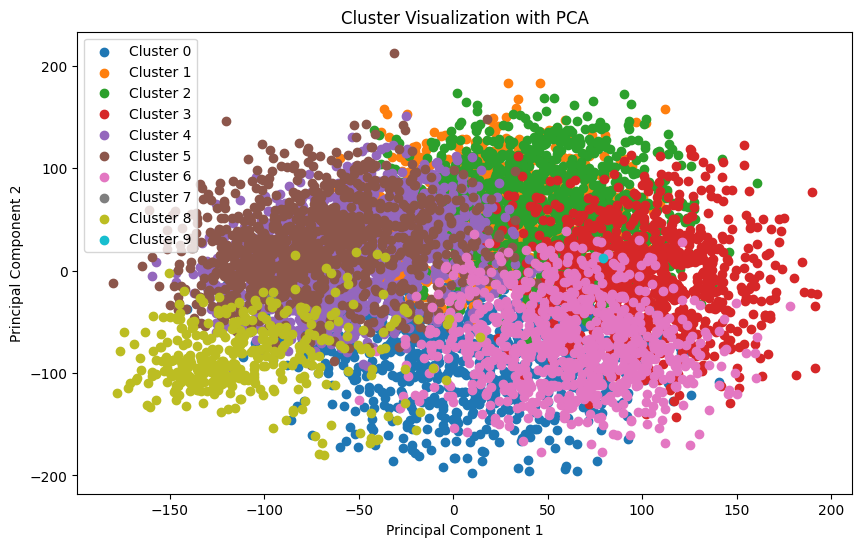

In [21]:
# Сначала применяем метод PCA для снижения размерности данных до двух главных компонент. 
# Затем мы строим диаграмму рассеяния, где каждая точка представляет объект данных, 
# а цвет или маркер указывает на принадлежность к кластеру.

# Снижение размерности данных до двух компонент с помощью PCA
pca = PCA(n_components=2)
components = pca.fit_transform(features)

# Визуализация данных
plt.figure(figsize=(10, 6))
for label in range(kmeans.n_clusters):
    plt.scatter(components[labels == label, 0], components[labels == label, 1], label=f'Cluster {label}')
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()



    
    
<div class="alert alert-success">
<b>Отличная визуализация!✅:</b> </div>
    